In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
from dateutil.parser import parse
import scipy.stats as stats

In [2]:
movie_df = pd.read_csv("../data/all_movies_with_twitter.csv")

movie_df.head()

,row,rank,movie_title,studio,total_gross,total_theater,opening_weekend_gross,opening_theater_count,release_date,close_date,twitter1,twitter2,twitter3,twitter4,twitter5
0,1,90,Eighth Grade,A24,"$1,648,837",158,"$263,797",4,8/3/18,-,EighthGrade,NaN,NaN,NaN,NaN
1,2,57,Mission: Impossible - Fallout,Par.,"$77,526,635","4,386","$61,236,534","4,386",7/27/18,-,MissionImpossible,MissionImpossibleFallout,NaN,NaN,NaN
2,3,84,Teen Titans Go! To The Movies,WB,"$13,640,501","3,188","$10,411,189","3,188",7/27/18,-,TeenTitansGOMovie,NaN,NaN,NaN,NaN
3,4,91,Princess Mononoke - Studio Ghibli (2018),Fathom,"$1,464,271",739,"$489,847",739,7/22/18,-,princessmononoke,NaN,NaN,NaN,NaN
4,5,22,Mamma Mia! Here We Go Again,Uni.,"$60,227,525","3,514","$34,952,180","3,317",7/20/18,-,MammaMia2,NaN,NaN,NaN,NaN


In [3]:
movieSeason_df = pd.read_csv("../data/movieSeason.csv")
for i in movieSeason_df.index:
    BeginDT = parse(movieSeason_df.loc[i,  "begin_date"])
    EndDT = parse(movieSeason_df.loc[i,  "end_date"])
    movieSeason_df.loc[i, "BeginDt"] = BeginDT
    movieSeason_df.loc[i, "EndDt"] = EndDT
    #print ("Year:"  + str(movieSeason_df.loc[i, "year"]) + " Season:" +  movieSeason_df.loc[i, "season_type"] + " begin date: " + str(BeginDT) + "  end date: " + str(EndDT) )

movieSeason_df                    

,year,season_type,begin_date,end_date,BeginDt,EndDt
0,2018,Winter,1/8/2018,3/1/2018,2018-01-08,2018-03-01
1,2018,Spring,3/2/2018,5/3/2018,2018-03-02,2018-05-03
2,2018,Summer,5/4/2018,9/3/2018,2018-05-04,2018-09-03
3,2018,Fall,9/4/2018,11/1/2018,2018-09-04,2018-11-01
4,2018,Holiday,11/2/2018,1/6/2019,2018-11-02,2019-01-06
5,2017,Winter,1/9/2017,3/2/2017,2017-01-09,2017-03-02
6,2017,Spring,3/3/2017,5/4/2017,2017-03-03,2017-05-04
7,2017,Summer,5/5/2017,9/4/2017,2017-05-05,2017-09-04
8,2017,Fall,9/5/2017,11/2/2017,2017-09-05,2017-11-02
9,2017,Holiday,11/3/2017,1/7/2018,2017-11-03,2018-01-07


In [4]:
# parse out release month in number & name
movie_df["ReleaseMonth"] = ""
movie_df["ReleaseMonthName"] = ""
movie_df["Season"] = ""

for i in movie_df.index:
    releaseDT = parse(movie_df.loc[i,  "release_date"])
    #print (releaseDT)
    ReleaseMonth = int(releaseDT.strftime("%m"))
    #print(ReleaseMonth)
    movie_df.loc[i, "ReleaseMonth"] = ReleaseMonth
    ReleaseMonthName = releaseDT.strftime("%B")
    #print(ReleaseMonth)
    movie_df.loc[i, "ReleaseMonthName"] = ReleaseMonthName
    
    for j in movieSeason_df.index:
        if  movieSeason_df.loc[j, "BeginDt"] <= releaseDT <= movieSeason_df.loc[j, "EndDt"]:
                movie_df.loc[i, "Season"] = movieSeason_df.loc[j, "season_type" ]
    

movie_df.head() 
#movie_df["ReleaseMonth"].head()
#movie_df.to_csv("data/MovieByReleaseMonth.csv", index=False)


,row,rank,movie_title,studio,total_gross,total_theater,opening_weekend_gross,opening_theater_count,release_date,close_date,twitter1,twitter2,twitter3,twitter4,twitter5,ReleaseMonth,ReleaseMonthName,Season
0,1,90,Eighth Grade,A24,"$1,648,837",158,"$263,797",4,8/3/18,-,EighthGrade,NaN,NaN,NaN,NaN,8,August,Summer
1,2,57,Mission: Impossible - Fallout,Par.,"$77,526,635","4,386","$61,236,534","4,386",7/27/18,-,MissionImpossible,MissionImpossibleFallout,NaN,NaN,NaN,7,July,Summer
2,3,84,Teen Titans Go! To The Movies,WB,"$13,640,501","3,188","$10,411,189","3,188",7/27/18,-,TeenTitansGOMovie,NaN,NaN,NaN,NaN,7,July,Summer
3,4,91,Princess Mononoke - Studio Ghibli (2018),Fathom,"$1,464,271",739,"$489,847",739,7/22/18,-,princessmononoke,NaN,NaN,NaN,NaN,7,July,Summer
4,5,22,Mamma Mia! Here We Go Again,Uni.,"$60,227,525","3,514","$34,952,180","3,317",7/20/18,-,MammaMia2,NaN,NaN,NaN,NaN,7,July,Summer


In [5]:
# convert opening_weekend_gross from string to float
movie_df.loc[:,['opening_weekend_gross']] = \
     movie_df['opening_weekend_gross'].apply(lambda x: float( x.replace('$','').replace(',','') )\
                                       if type(x) is str else -1.0)

movie_df.loc[:,['opening_theater_count']] = \
     movie_df['opening_theater_count'].apply(lambda x: float( x.replace('$','').replace(',','') )\
                                       if type(x) is str else -1.0)


movie_df.head()
movie_df.to_csv("../data/MovieByReleaseSeaon.csv", index=False)


In [6]:
######   test only
#for i in movie_df.index:
#    if movie_df.loc[i, "Season"] == "fall":
#        movie_df.loc[i, "opening_weekend_gross"] = movie_df.loc[i, "opening_weekend_gross"] / 10
        

In [7]:
# filter out limited releases
# Converting a GroupBy object into a DataFrame
# Group by Season

wideRelease_df = movie_df.loc[movie_df["opening_theater_count"] >= 2000]
wideReleasegroupBySeason =  wideRelease_df.groupby(["Season"])

WReleasegroupBySeason_pd = pd.DataFrame({'Release Count' :wideReleasegroupBySeason.size()})
WReleasegroupBySeason_pd["Total Opening Weekend Gross"] = pd.DataFrame(wideReleasegroupBySeason["opening_weekend_gross"].sum())
WReleasegroupBySeason_pd["Mean Opening Weekend Gross (Mil)"] = WReleasegroupBySeason_pd["Total Opening Weekend Gross"] / WReleasegroupBySeason_pd["Release Count"] / 1000000

WReleasegroupBySeason_pd = WReleasegroupBySeason_pd.sort_values(by =["Mean Opening Weekend Gross (Mil)"])

WReleasegroupBySeason_pd

,Release Count,Total Opening Weekend Gross,Mean Opening Weekend Gross (Mil)
Season,,,
Fall,43,7.647113e+08,17.783983
Winter,14,4.085550e+08,29.182503
Spring,21,6.340390e+08,30.192335
Summer,84,2.959237e+09,35.229008
Holiday,35,1.299645e+09,37.132717


In [8]:
WReleasegroupBySeason_pd.reset_index(level=0, inplace=True)
WReleasegroupBySeason_pd

,Season,Release Count,Total Opening Weekend Gross,Mean Opening Weekend Gross (Mil)
0,Fall,43,7.647113e+08,17.783983
1,Winter,14,4.085550e+08,29.182503
2,Spring,21,6.340390e+08,30.192335
3,Summer,84,2.959237e+09,35.229008
4,Holiday,35,1.299645e+09,37.132717


In [9]:
WRplot_df = WReleasegroupBySeason_pd[["Season", "Mean Opening Weekend Gross (Mil)"]]
WRplot_df.set_index("Season", inplace=True)

WRplot_df

,Mean Opening Weekend Gross (Mil)
Season,
Fall,17.783983
Winter,29.182503
Spring,30.192335
Summer,35.229008
Holiday,37.132717


In [15]:
meanAll = WRplot_df["Mean Opening Weekend Gross (Mil)"].mean()
meanAll

29.904109247320047

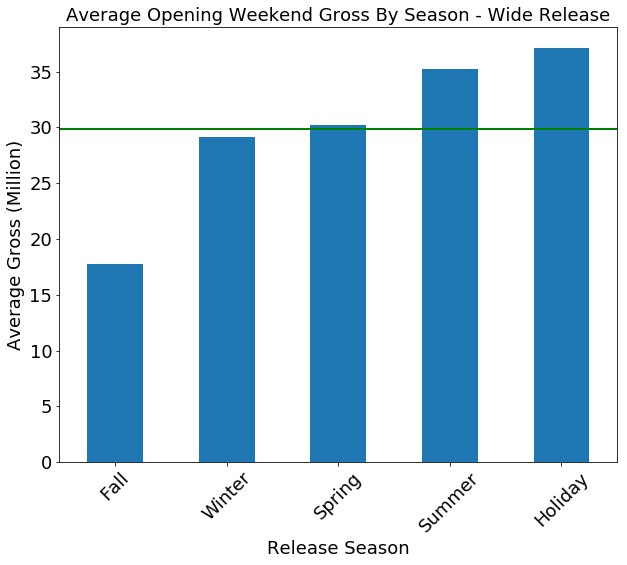

In [18]:
ax = WRplot_df.plot(kind='bar', \
                  figsize=(10, 8), legend=False, fontsize=18, rot=45 )

ax.set_title('Average Opening Weekend Gross By Season - Wide Release',fontsize= 18)
ax.set_xlabel("Release Season", fontsize=18)
ax.set_ylabel("Average Gross (Million)", fontsize=18)
ax.axhline(meanAll, color='green', linewidth=2)
plt.savefig('../plots/box_office_by_season_meanline.png',dpi=200)
plt.show()

In [11]:
wideRelease_df
spring = wideRelease_df[wideRelease_df["Season"] == "Spring"]["opening_weekend_gross"].tolist()
summer = wideRelease_df[wideRelease_df["Season"] == "Summer"]["opening_weekend_gross"].tolist()
fall = wideRelease_df[wideRelease_df["Season"] == "Fall"]["opening_weekend_gross"].tolist()
winter = wideRelease_df[wideRelease_df["Season"] == "Winter"]["opening_weekend_gross"].tolist()
holiday = wideRelease_df[wideRelease_df["Season"] == "Holiday"]["opening_weekend_gross"].tolist()

stats.f_oneway(spring,summer, fall, winter, holiday )


F_onewayResult(statistic=1.6859074163011545, pvalue=0.1548510151290643)